In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib as plt


In [ ]:
# Load the iris dataset
dataset = load_iris()

# Create a DataFrame from the 'data' part of the dataset with appropriate column names
data = pd.DataFrame(dataset['data'], columns=["PetalLength", "PetalWidth", "SepalLength", "SepalWidth"])

# Add the 'Species' column to the DataFrame and map target values to corresponding target names
data['Species'] = dataset['target_names'][dataset['target']]



In [ ]:
data.head()

,PetalLength,PetalWidth,SepalLength,SepalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,PetalLength,PetalWidth,SepalLength,SepalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PetalLength  150 non-null    float64
 1   PetalWidth   150 non-null    float64
 2   SepalLength  150 non-null    float64
 3   SepalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

PetalLength    0
PetalWidth     0
SepalLength    0
SepalWidth     0
Species        0
dtype: int64

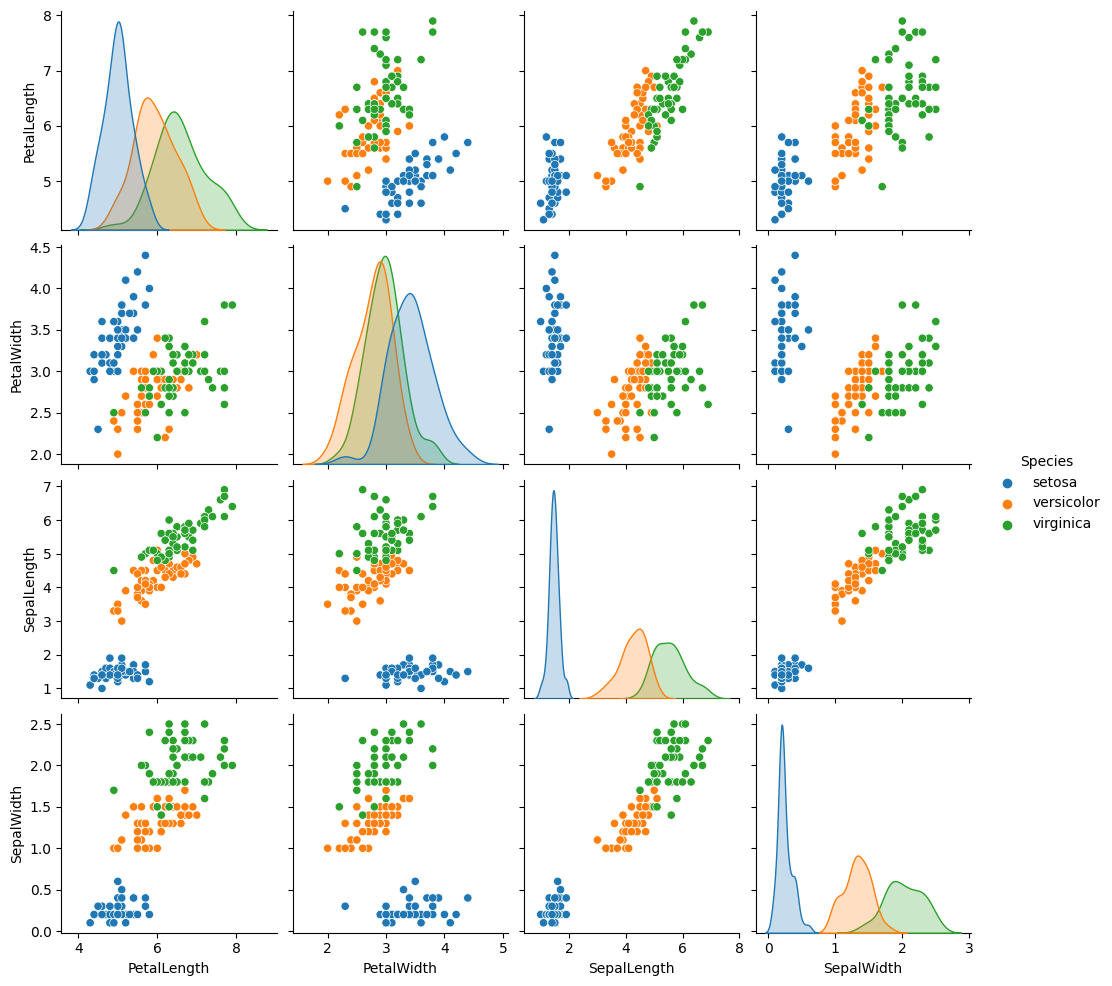

In [ ]:
sns.pairplot(data,hue='Species')

In [ ]:
cor_Mat = data.corr()

<ipython-input-45-f12e50e139ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_Mat = data.corr()


<Axes: >

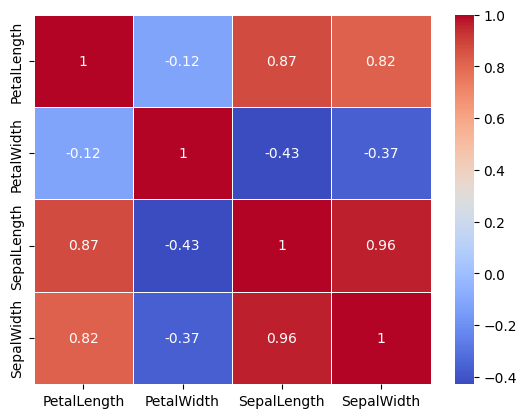

In [ ]:
plt.figure
sns.heatmap(cor_Mat, annot=True, cmap='coolwarm', linewidths=0.5)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


model = LogisticRegression()

In [ ]:
X=dataset.data
y=dataset.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
mp = model.predict(X_test)

In [ ]:
mp

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
new_test_data = np.array([[6.5,4.3,2.1,1.6]])
predicted_species = model.predict(new_test_data)
predicted_species

array([0])

In [ ]:
predicted_species_name = dataset['target_names'][predicted_species][0]

print("New Data Point:")
print("Petal length:", new_test_data[0, 0])
print("Petal width:", new_test_data[0, 1])
print("Sepal length:", new_test_data[0, 2])
print("Sepal width:", new_test_data[0, 3])
print("Predicted Species:", predicted_species_name)

New Data Point:
Petal length: 6.5
Petal width: 4.3
Sepal length: 2.1
Sepal width: 1.6
Predicted Species: setosa
